In this project, we will make an end-to-end Deep Learning model to predict the car brand using Transfer Learning. Here we use the state of the Resnet50 model.

In [45]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

In [47]:
# Specify Image size and paths
image_size = [224, 224]
train_path = '/content/train'
test_path = '/content/test'

In [48]:
#Download the ResNet50. Don't include the last layer as this model is trained to predict from more that thousand different categories but we need to predict only
#three categories.
resnet = ResNet50(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [49]:
#Don't train the model as we will use the weights of the model trained on the imagenet dataset
for layer in resnet.layers:
    layer.trainable = False

In [50]:
folders = glob('/content/train/*')

In [52]:
#make a Flatten layes as before the Dense layer, we need a fully connected flatten layer.
x = Flatten()(resnet.output)

In [53]:
x

<KerasTensor: shape=(None, 100352) dtype=float32 (created by layer 'flatten_2')>

In [54]:
# Add the Dense layer
predictions = Dense((len(folders)+1), activation = 'softmax')(x)

In [55]:
model = Model(inputs = resnet.input, outputs = predictions)

In [56]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [57]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [58]:
train_datagen = ImageDataGenerator(rescale= 1./255, shear_range= 0.2, zoom_range= 0.2, horizontal_flip= True)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [59]:
training_set = train_datagen.flow_from_directory('/content/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 4 classes.


In [60]:
test_set = test_datagen.flow_from_directory('/content/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 4 classes.


In [61]:
history = model.fit_generator(training_set, validation_data= test_set, epochs = 50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 5s 2s/step - loss: 4.6845 - accuracy: 0.3333 - val_loss: 14.6785 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 1s 631ms/step - loss: 13.1711 - accuracy: 0.2917 - val_loss: 5.0720 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 1s 633ms/step - loss: 4.8527 - accuracy: 0.3021 - val_loss: 5.1789 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 1s 630ms/step - loss: 5.4988 - accuracy: 0.4271 - val_loss: 8.4688 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 1s 635ms/step - loss: 4.8530 - accuracy: 0.4583 - val_loss: 6.0190 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 1s 634ms/step - loss: 4.1994 - accuracy: 0.3854 - val_loss: 3.6652 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 1s 878ms/step - loss: 3.4327 - accuracy: 0.2812 - val_loss: 4.1762 - val_accuracy: 0.5172
Epoch 8/50
2/2 [=====

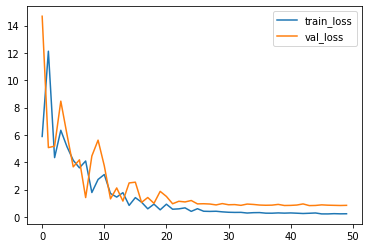

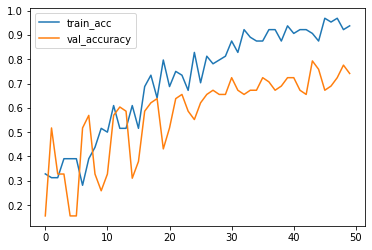

In [65]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [66]:
model.save('car_logo_detection.h5')